In [25]:
#Importing pakages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score



In [2]:
zoo = pd.read_csv("/content/Zoo.csv")

In [3]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
zoo["type"].unique()

array([1, 4, 2, 7, 6, 5, 3])

# **EDA**

[]

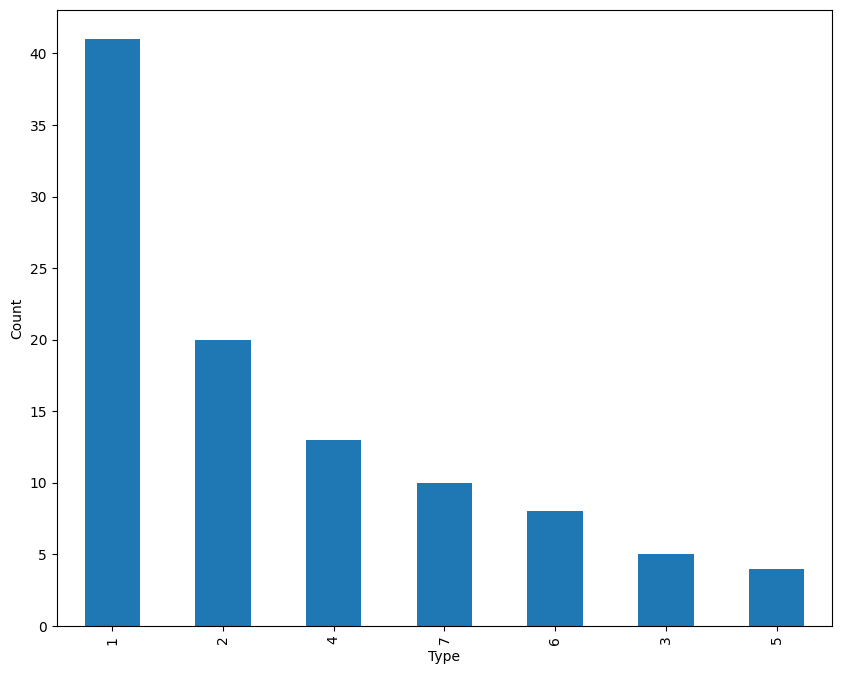

In [6]:
plt.figure(figsize=(10,8))
zoo["type"].value_counts().plot(kind="bar")
plt.xlabel('Type')
plt.ylabel("Count")
plt.plot()

[]

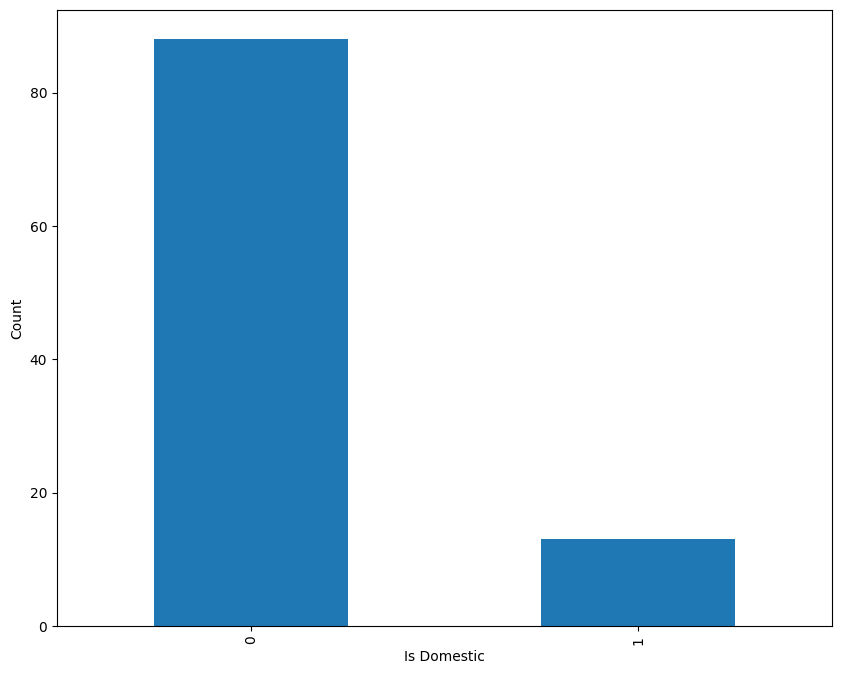

In [8]:

plt.figure(figsize=(10,8))
zoo['domestic'].value_counts().plot(kind='bar')
plt.xlabel("Is Domestic")
plt.ylabel('Count')
plt.plot()

In [9]:
pd.crosstab(zoo['type'], zoo.domestic)

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


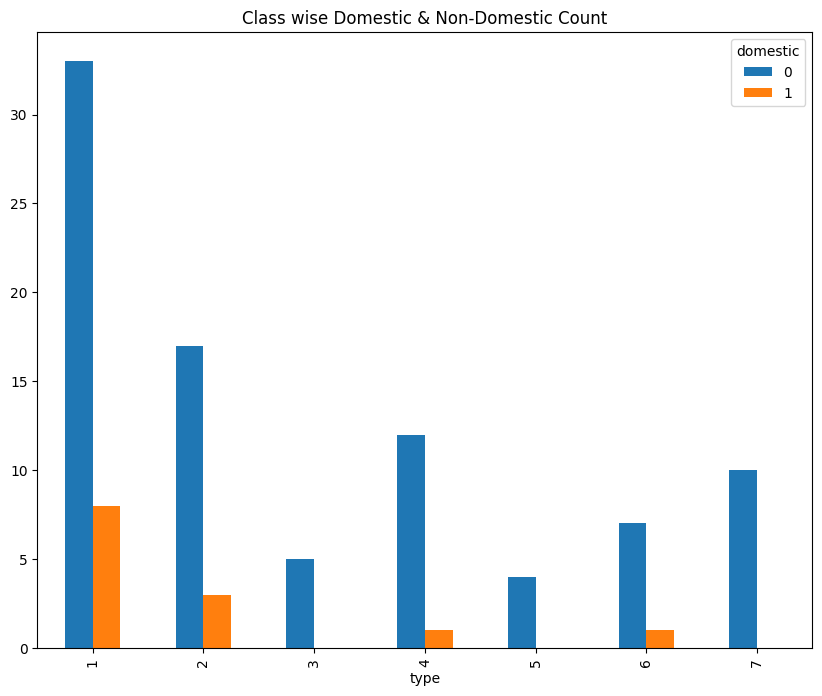

In [10]:
pd.crosstab(zoo['type'], zoo.domestic).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();


In [11]:
#Animals providing Milk
zoo.milk.value_counts()

0    60
1    41
Name: milk, dtype: int64

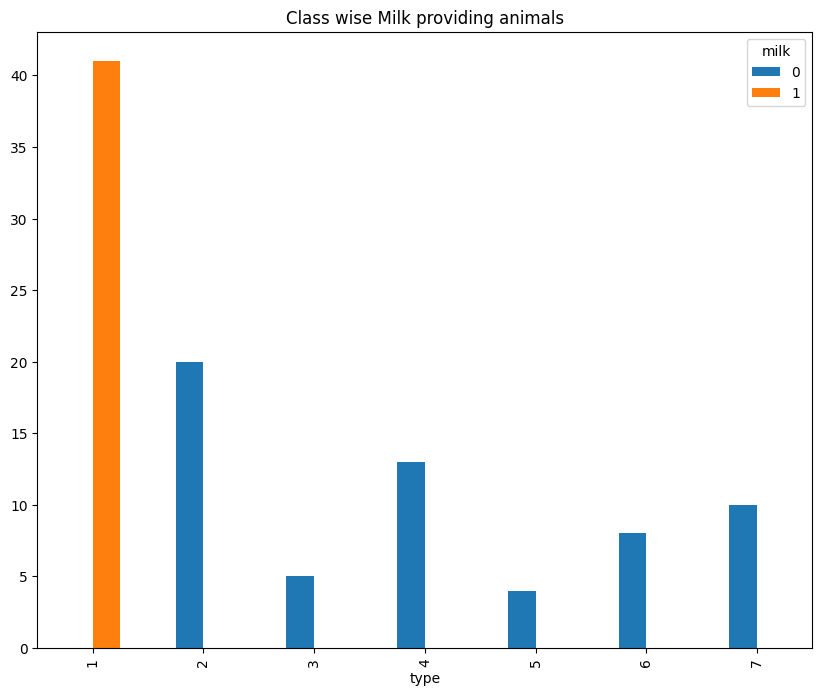

In [12]:
#count of Milk providing animal acoording to type
pd.crosstab(zoo["type"], zoo.milk).plot(kind="bar", title="Class wise Milk providing animals", figsize=(10, 8));

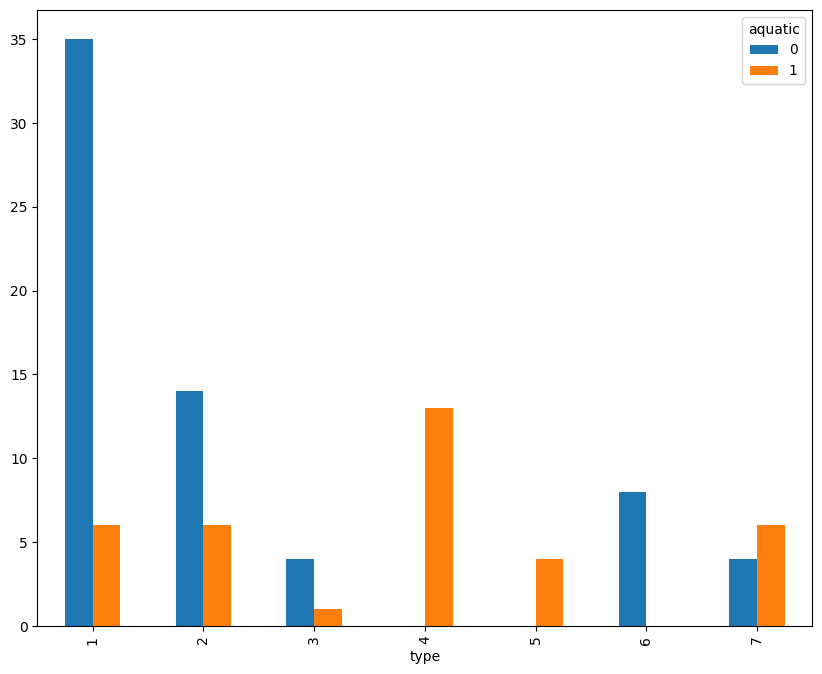

In [14]:
#Animals Having Fins
pd.crosstab(zoo["type"], zoo.aquatic).plot(kind="bar", figsize=(10, 8));


<Axes: xlabel='type'>

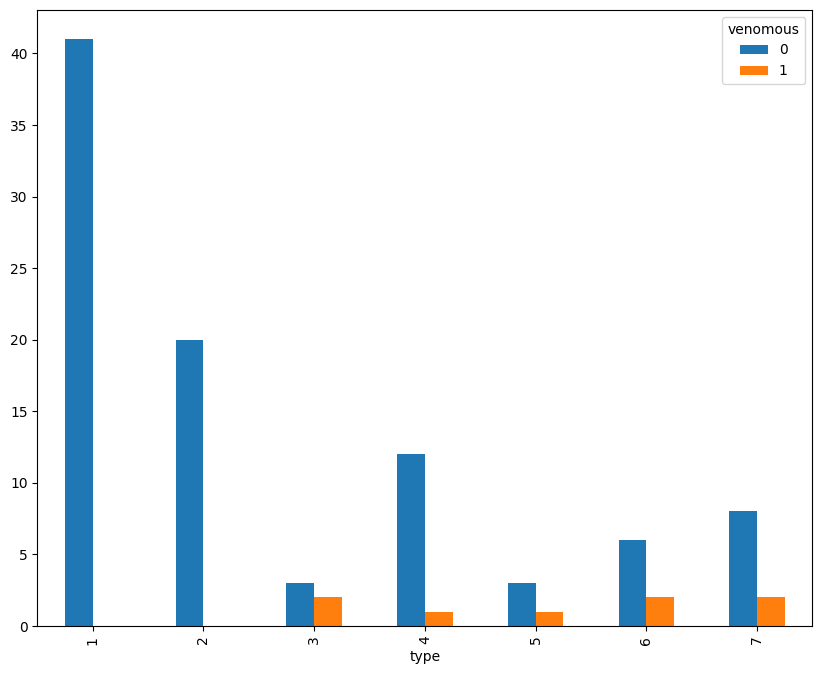

In [15]:
pd.crosstab(zoo["type"], zoo.venomous).plot(kind="bar", figsize=(10, 8))


# **Model Building**

In [16]:
zoo.shape

(101, 18)

In [18]:
X = zoo.loc[:, ["milk", "backbone", "toothed", "venomous", "domestic", "aquatic"]].values

In [20]:
Y = zoo.iloc[:,17].values

In [23]:
#Spliting data into Train and Test Set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [26]:
clf = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2) 


In [28]:
clf.fit(X_train, Y_train)

KNeighborsClassifier()

# **Prediction of Data**

In [29]:
y_pred = clf.predict(X_test)

In [30]:
y_pred

array([4, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 6, 4, 6, 1, 6, 2, 4, 2, 3,
       1, 2, 1, 1])

# **Model Accuracy**

In [32]:
print("Accuracy of KNN Regression:",accuracy_score(Y_test, y_pred))

Accuracy of KNN Regression: 0.9230769230769231
